In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
def momentum(datafile, g):
    # g is generator, for GENIE, g =1 , for NuWro, g=0

    if (g == 1):
        dataQE = datafile[datafile["Process"]==1]
        dataNonQE = datafile[datafile["Process"]!=1]
    if (g == 0):
        dataQE = datafile[datafile["Process"]==0]
        dataNonQE = datafile[datafile["Process"]!=0]

    nMomQE = dataQE['MomN']
    nMomNonQE = dataNonQE['MomN'] 

    # Normalising
    histQE, bQE = np.histogram(nMomQE, bins=500,density=False)
    histNonQE, bNonQE = np.histogram(nMomNonQE, bins=200, density=False)

    bwQE = bQE[1] - bQE[0]
    bwNonQE = bNonQE[1] - bNonQE[0]

    NQE = np.sum(histQE) * bwQE
    NnonQE = np.sum(histNonQE) * bwNonQE

    QE = histQE / NQE
    NonQE = histNonQE / NQE    
    
    plt.bar(bQE[:-1], QE, width=bwQE,alpha=0.5,label='QE (sig)',color='blue')
    plt.bar(bNonQE[:-1], NonQE, width=bwNonQE,alpha=0.7,label='Non-QE (bkg)',color='red')
    plt.xlim(0,1.2)
    plt.xlabel("Momentum (Gev/c)")
    plt.ylabel("PDF")
    plt.legend()
    # plt.show()      

In [9]:
Ar_genie = pd.read_csv('Ar_neutron_genie.csv',sep="\t")
C_genie = pd.read_csv('C_neutron_genie.csv',sep="\t")
Ar_nuwro = pd.read_csv('Ar_neutron_nuwro.csv',sep="\t")
C_nuwro = pd.read_csv('C_neutron_nuwro.csv',sep="\t")

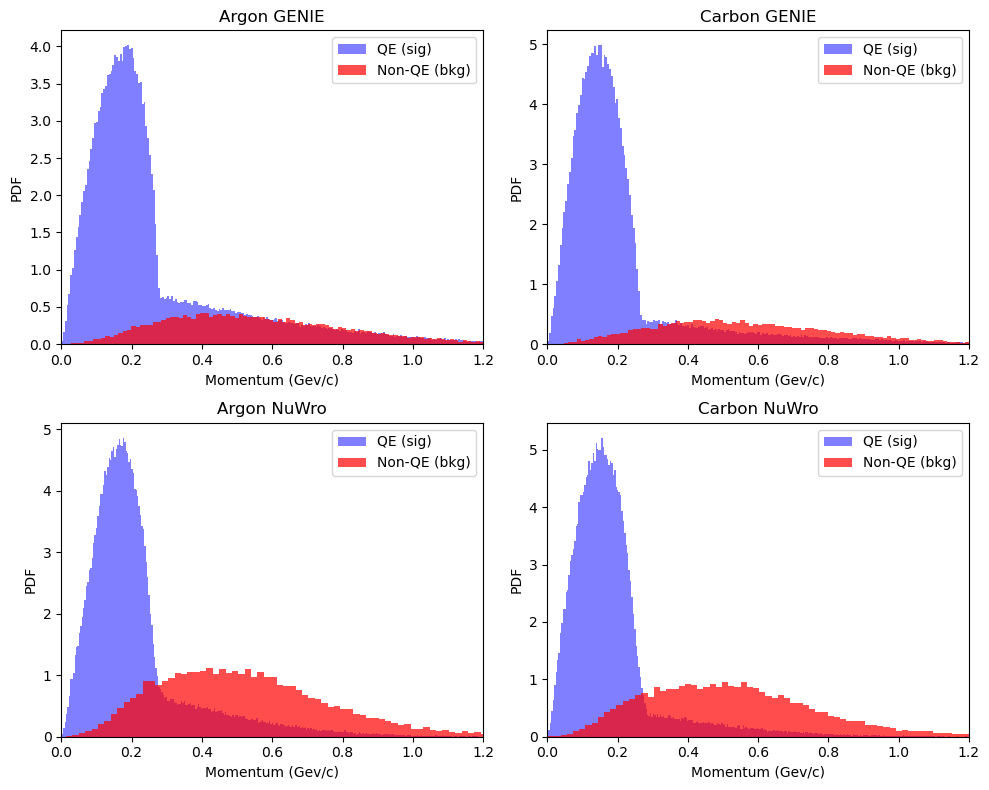

In [38]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
momentum(Ar_genie,1)
plt.title("Argon GENIE")

plt.subplot(2, 2, 2)
momentum(C_genie,1)
plt.title("Carbon GENIE")

plt.subplot(2, 2, 3)
momentum(Ar_nuwro,0)
plt.title("Argon NuWro")

plt.subplot(2, 2, 4)
momentum(C_nuwro,0)
plt.title("Carbon NuWro")

plt.tight_layout()
plt.savefig('NeutronMom.png', dpi=600, bbox_inches='tight')
plt.show()